1/1 [==============================] - 2s 2s/step
4


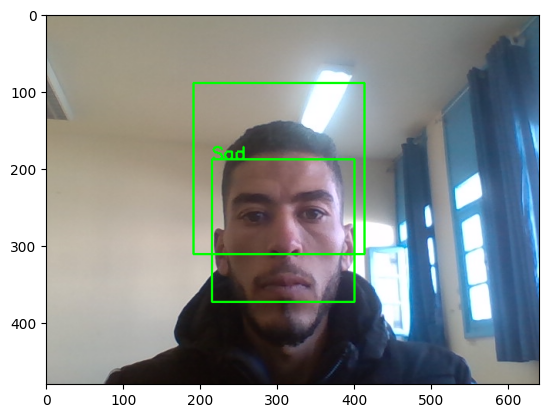

In [4]:
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
emotions = { #list of available emotions in the dataset
    0:"Angry",
    1:"Disgust",
    2:"Fear",
    3:"Happy",
    4:"Sad",
    5:"Surprize",
    6:"Neutral"
}
cap = cv2.VideoCapture(0)
# Read the input image
_, img = cap.read()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
font = cv2.FONT_HERSHEY_SIMPLEX
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 2)
for (x, y, w, h) in faces:
	cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
	faces = img[y:y + h, x:x + w]
	#plt.imshow(faces)
im = Image.fromarray(faces, 'RGB')
im = im.resize((48,48))
img_array = np.array(im)
img_array = img_array/255
img_array = np.expand_dims(img_array, axis=0)
model = load_model('model_expression.h5')
pred = model.predict(img_array)
pred = np.argmax(pred, axis=-1)
print(pred[0])
cv2.putText(img, emotions[pred[0]], (x, y), cv2.FONT_HERSHEY_SIMPLEX,
0.75, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cap.release()
cv2.destroyAllWindows()